## CS 4304
### Assignment 5
### Dylan Ellsworth
### 201329133
### Nov. 2, 2021

In this section we gain experience working with the Seaborn library.

Question 1: Recreate the iris scatterplot from assignment 2 using seaborn.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
setosa = iris[iris['species'] == 'setosa']
versicolor = iris[iris['species'] == 'versicolor']
virginica = iris[iris['species'] == 'virginica']

Text(0.5, 1.0, 'Iris Petals')

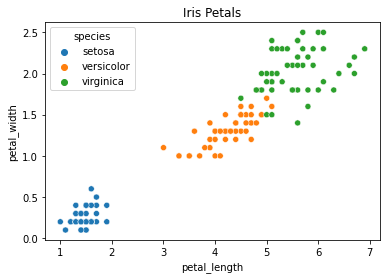

In [4]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = iris, hue = 'species')
plt.title('Iris Petals')

Question 2: Recreate the barplot from assignment 2 using seaborn.

In [5]:
iris['petal_area'] = iris['petal_length'] * iris['petal_width']
petal = iris[['species','petal_area']].groupby('species').mean().sort_values(by='petal_area', ascending = True).reset_index()
petal

,species,petal_area
0,setosa,0.3656
1,versicolor,5.7204
2,virginica,11.2962


<AxesSubplot:xlabel='petal_area', ylabel='species'>

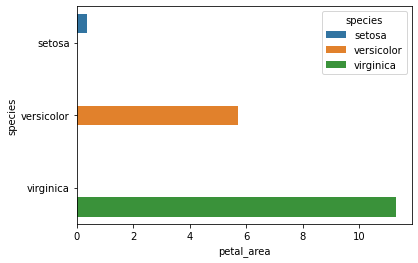

In [6]:
sns.barplot(x = 'petal_area', y = 'species', data = petal, hue = 'species')

Question 3: Recreate the violin plot using "used cars" data set from assignment 4

In [7]:
df = pd.read_csv('used_cars.csv')

Loop through the data and put it into a list

In [44]:
df = df.sort_values(by='year', ascending=False)
df = df[(df.year>= 2000) & (df.year<=2019)]
data = [df.price[df.year == year] for year in df.year.unique()]
data

[26121    11950
 95934    24995
 88508    22990
 3446     24998
 3447     20998
          ...  
 60280    17990
 45734    24999
 60284    25390
 45736    21499
 60703    11959
 Name: price, Length: 26771, dtype: int64,
 16832    20400
 79913    11000
 51314    25000
 16893    21750
 92788    12690
          ...  
 40375     9445
 1560     23990
 64886    12000
 43990    10990
 4334     53850
 Name: price, Length: 13664, dtype: int64,
 38112    12339
 27475    17990
 37042    10300
 7862     20000
 27473    16490
          ...  
 61277    15450
 61258    11000
 61161    10250
 61395     9400
 61398     8250
 Name: price, Length: 21733, dtype: int64,
 49166    29780
 49050    23282
 58713     6995
 49076    20480
 49057    16991
          ...  
 22920     6495
 22917     9498
 22977     8600
 22921     8298
 22983    11998
 Name: price, Length: 15850, dtype: int64,
 39167     9000
 39195    11495
 39194     8495
 65856     7999
 20130    23499
          ...  
 16688    18495
 12325    11

In [45]:
sns.violinplot(x = 'price', y ='year',data = data, hue ='year')

AttributeError: 'list' object has no attribute 'get'

Question 3:

In [102]:
cars = pd.read_csv('used_cars.csv',parse_dates=['year'])

In [108]:
cars = cars.sort_values(by='year', ascending=False)
cars = cars[(cars.year>= '2000') & (cars.year<='2019')]
cars.sort_values(by='year',ascending=True)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
43723,Accent,2000-01-01,1295,Automatic,47000,Petrol,NaN,38.7,1.3,Hyundai
20674,3 Series,2000-01-01,1550,Automatic,93000,Petrol,270.0,29.7,2.5,BMW
57310,SL CLASS,2000-01-01,11750,Automatic,68709,Petrol,270.0,24.6,3.2,Mercedes
88860,Golf,2000-01-01,1999,Manual,80670,Petrol,245.0,35.8,2.0,Volkswagen
56065,SLK,2000-01-01,3990,Automatic,113237,Petrol,270.0,27.2,3.2,Mercedes
...,...,...,...,...,...,...,...,...,...,...
95924,Sharan,2019-01-01,24698,Manual,50,Diesel,145.0,43.5,2.0,Volkswagen
95921,Sharan,2019-01-01,26995,Manual,207,Diesel,145.0,43.5,2.0,Volkswagen
95923,Sharan,2019-01-01,21998,Manual,9911,Petrol,145.0,35.3,1.4,Volkswagen
3440,A6,2019-01-01,29991,Automatic,1850,Diesel,145.0,47.9,2.0,Audi


In [129]:
cars = cars[(cars.transmission == 'Automatic') | (cars.transmission == 'Manual')]
auto = (cars.transmission == 'Automatic').sum()
manual = (cars.transmission == 'Manual').sum()

In [130]:
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
3447,A1,2019-01-01,20998,Manual,1800,Petrol,145.0,47.9,1.0,Audi
21959,EcoSport,2019-01-01,15489,Manual,5636,Diesel,145.0,68.9,1.5,Ford
51634,GLA Class,2019-01-01,25899,Automatic,5647,Diesel,145.0,56.5,2.1,Mercedes
51630,A Class,2019-01-01,20899,Automatic,11587,Petrol,145.0,53.3,1.3,Mercedes
51632,E Class,2019-01-01,43999,Automatic,6632,Petrol,145.0,32.8,3.0,Mercedes
...,...,...,...,...,...,...,...,...,...,...
66268,Yaris,2000-01-01,2695,Automatic,21000,Petrol,160.0,42.9,1.3,Toyota
38731,Fiesta,2000-01-01,1995,Manual,43000,Petrol,160.0,41.5,1.3,Ford
20074,5 Series,2000-01-01,1699,Manual,99209,Petrol,265.0,29.4,2.0,BMW
56065,SLK,2000-01-01,3990,Automatic,113237,Petrol,270.0,27.2,3.2,Mercedes


Text(0.5, 1.0, 'Average Used car prices')

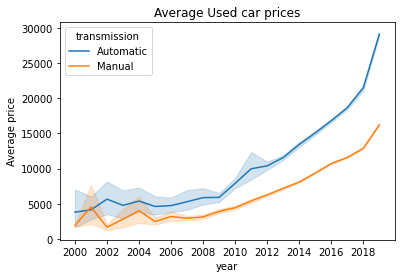

In [135]:
ax = sns.lineplot(x='year',y='price',data = cars, hue='transmission',hue_order=['Automatic','Manual'],legend='full')
ax.set_ylabel('Average price')
ax.set_title('Average Used car prices')
